In [1]:
import numpy as np
from sklearn.decomposition import PCA
from skimage import io
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from motionblur.motionblur import Kernel
import random
import cv2,os
import imageio
from PIL import Image, ImageDraw, ImageFont

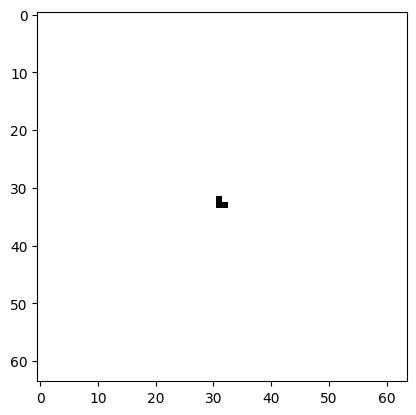

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6

In [30]:
img = Image.open('/raid/joowan/debug/kernel_check/000009.png/0/7_139_kernel.png').convert('L')
plt.imshow(img, 'gray')
plt.show()
img=np.array(img)

for a in img:
    print(a)
print(np.max(img))

In [2]:
# Initialize an empty list to store the images
images = []

# Load images (assuming the images are in a folder named 'images_folder')
for filepath in glob.glob('/raid/joowan/kernels_64/*.png'): # Adjust the path and extension as necessary
    img = io.imread(filepath, as_gray=True)  # Load image as grayscale
    images.append(img)

# Convert the list of images to a numpy array
images = np.array(images)

# Get the number of images and flatten each image
n_samples, h, w = images.shape
data= images.reshape((n_samples, h*w))

print(f'data.shape:{data.shape}')


data.shape:(60000, 4096)


# 2D

# Train

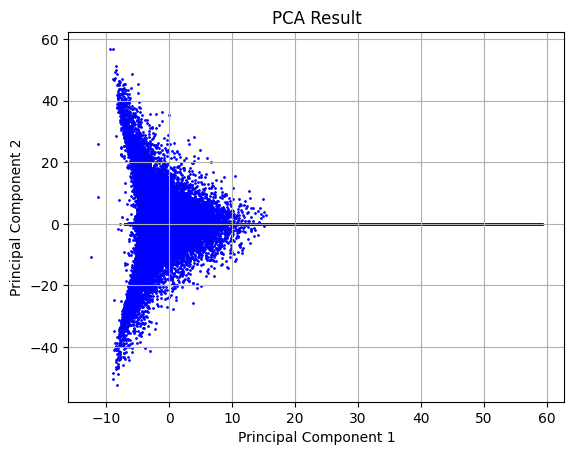

pca components 개수:531


In [12]:
pca = PCA(n_components=0.8)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

pca_result = pca.fit_transform(data_standardized)


plt.scatter(pca_result[:, 0], pca_result[:, 1], s=1, c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()

print(f'pca components 개수:{len(pca.components_)}')
# np.save('pca_components.npy', pca.components_)

In [9]:
pca.components_.shape

kernel_img=np.array(io.imread('same_1.png', as_gray=True)).reshape(1,-1)
kernel_img_orign=np.array(io.imread('same_1.png', as_gray=True)).reshape(1,-1)


scaler.transform(kernel_img)
kernel1_pca=pca.transform(kernel_img)
array= kernel_img @ pca.components_.T

kernel1_pca_origin=pca.transform(kernel_img_orign)
array_origin= kernel_img_orign @ pca.components_.T

print(kernel1_pca)
print(array)

print(kernel1_pca_origin)
print(array_origin)

[[ 147.37974572   -0.8519111   179.06819626 -132.13767601   -7.02345005
    46.05644061 -136.69720161  167.24627107   17.61759894   42.417447
     1.95826807 -125.64498533  -54.54576989 -106.40634002   69.47776814
   -76.87550432   19.27433763  101.29829653    1.62493807   95.31809248
   -26.951314    -30.56480616  -47.58158236   87.71455098  -84.33090437
    15.880136     47.52423292  -10.82573153   19.44596454   23.53005903]]
[[ 147.37974572   -0.8519111   179.06819626 -132.13767601   -7.02345005
    46.05644061 -136.69720161  167.24627107   17.61759894   42.417447
     1.95826807 -125.64498533  -54.54576989 -106.40634002   69.47776814
   -76.87550432   19.27433763  101.29829653    1.62493807   95.31809248
   -26.951314    -30.56480616  -47.58158236   87.71455098  -84.33090437
    15.880136     47.52423292  -10.82573153   19.44596454   23.53005903]]
[[ 147.37974572   -0.8519111   179.06819626 -132.13767601   -7.02345005
    46.05644061 -136.69720161  167.24627107   17.61759894   42.4

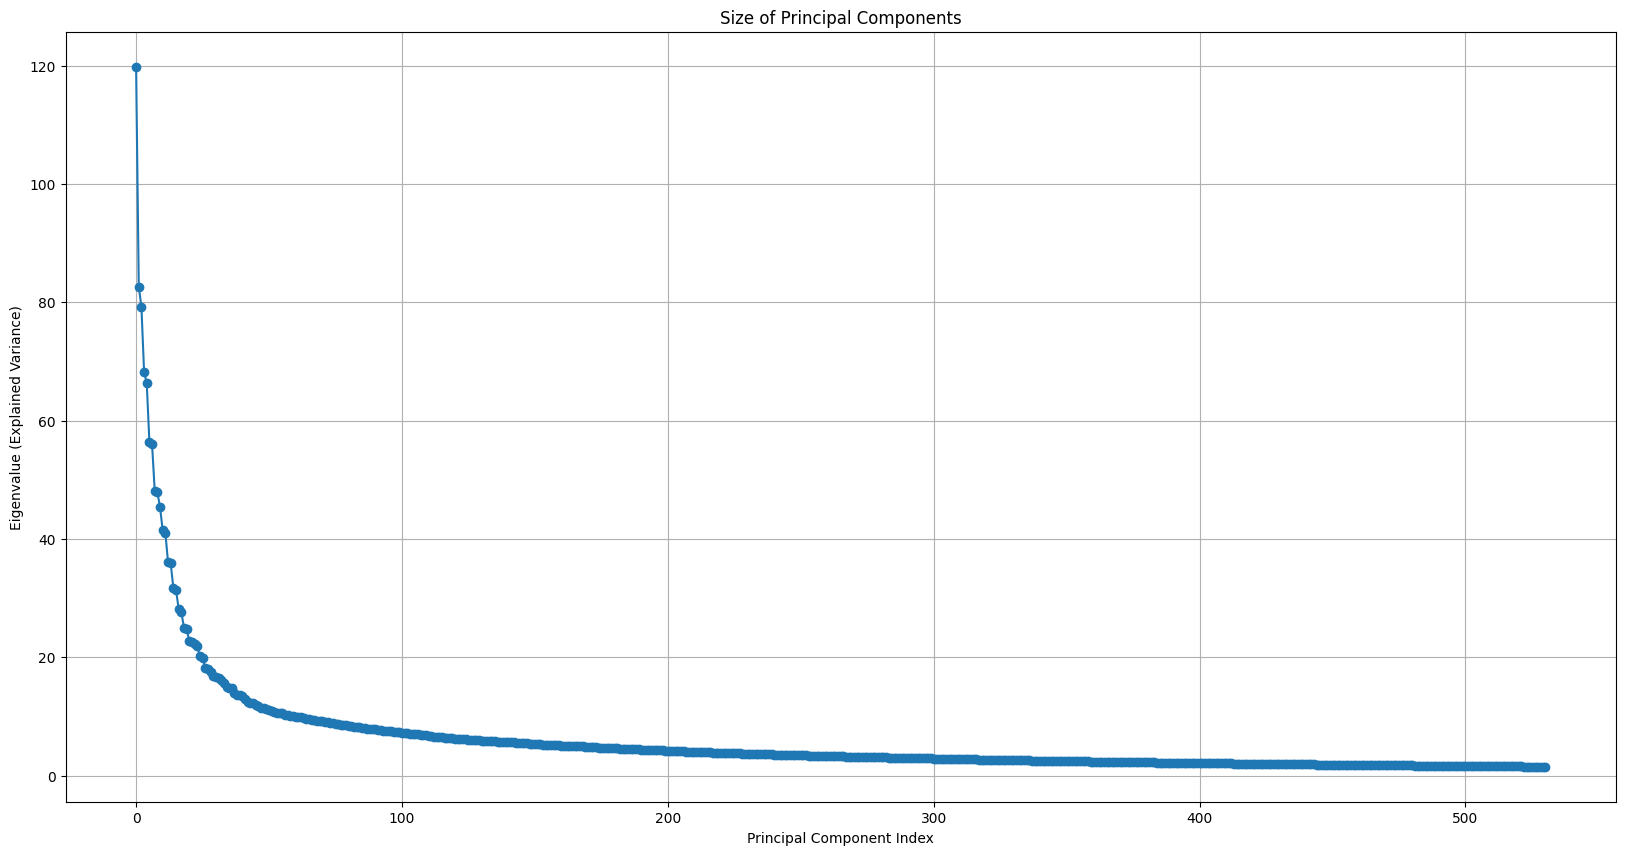

In [13]:
eigenvalues = pca.explained_variance_
# Plot the eigenvalues
plt.figure(figsize=(20,10))
plt.plot(eigenvalues, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Size of Principal Components')
plt.grid(True)
plt.show()



# 주요 pca components를 분석

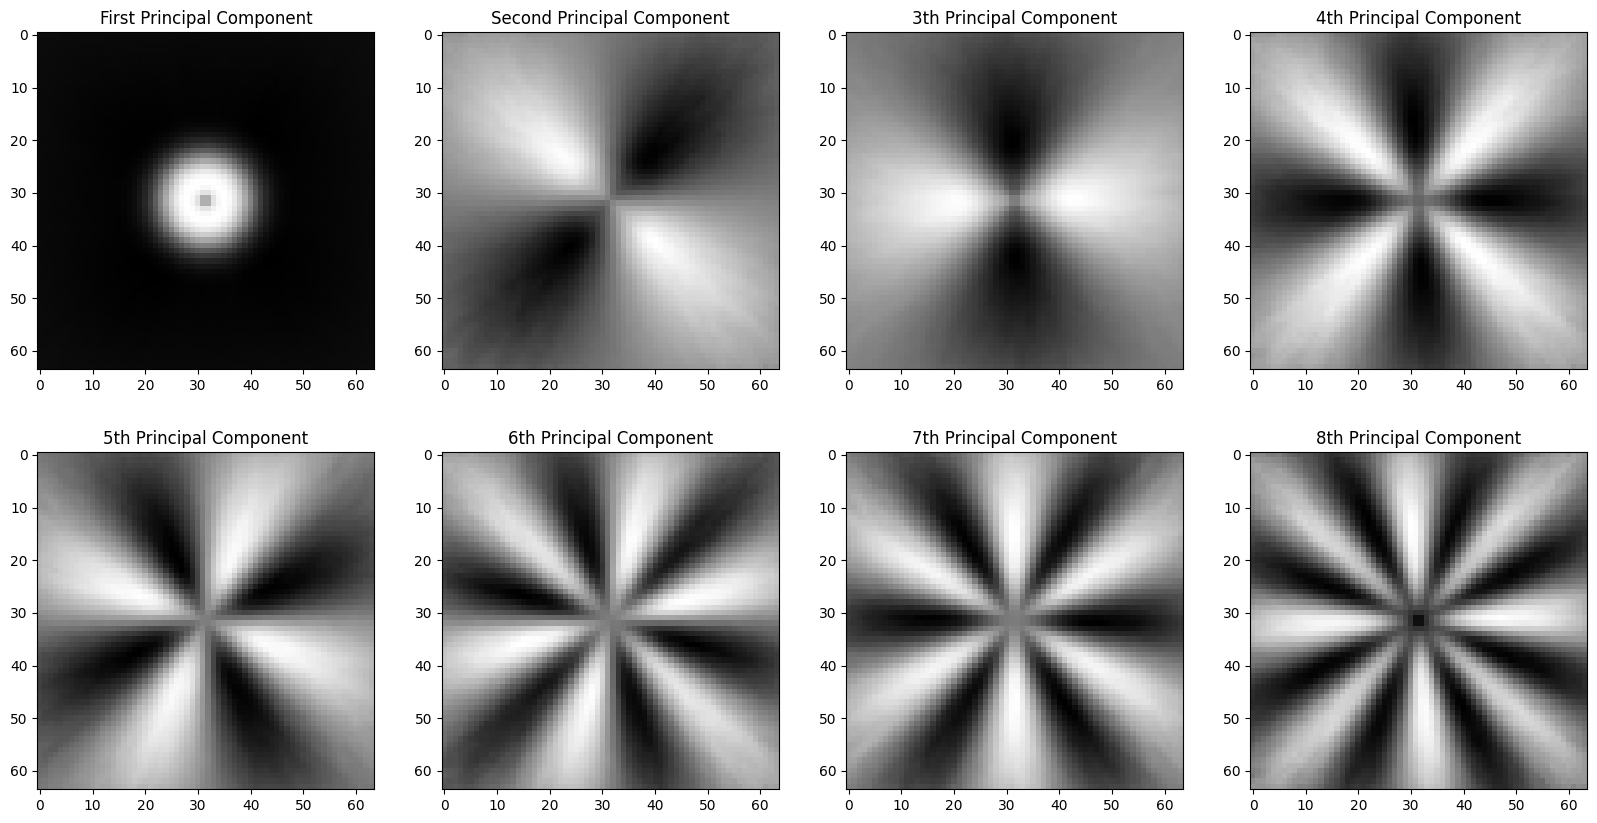

In [18]:
components = pca.components_

# 이미지 형태, 예를 들면 (28, 28) 같은 MNIST 데이터의 경우
image_shape = (64,64)

plt.figure(figsize=(20,10))

# 첫 번째 component를 표시합니다.
plt.subplot(2, 4, 1)
plt.imshow(components[0].reshape(image_shape), cmap='gray')
plt.title("First Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 2)
plt.imshow(components[1].reshape(image_shape), cmap='gray')
plt.title("Second Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 3)
plt.imshow(components[2].reshape(image_shape), cmap='gray')
plt.title("3th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 4)
plt.imshow(components[3].reshape(image_shape), cmap='gray')
plt.title("4th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 5)
plt.imshow(components[4].reshape(image_shape), cmap='gray')
plt.title("5th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 6)
plt.imshow(components[5].reshape(image_shape), cmap='gray')
plt.title("6th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 7)
plt.imshow(components[6].reshape(image_shape), cmap='gray')
plt.title("7th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 8)
plt.imshow(components[7].reshape(image_shape), cmap='gray')
plt.title("8th Principal Component")

plt.show()

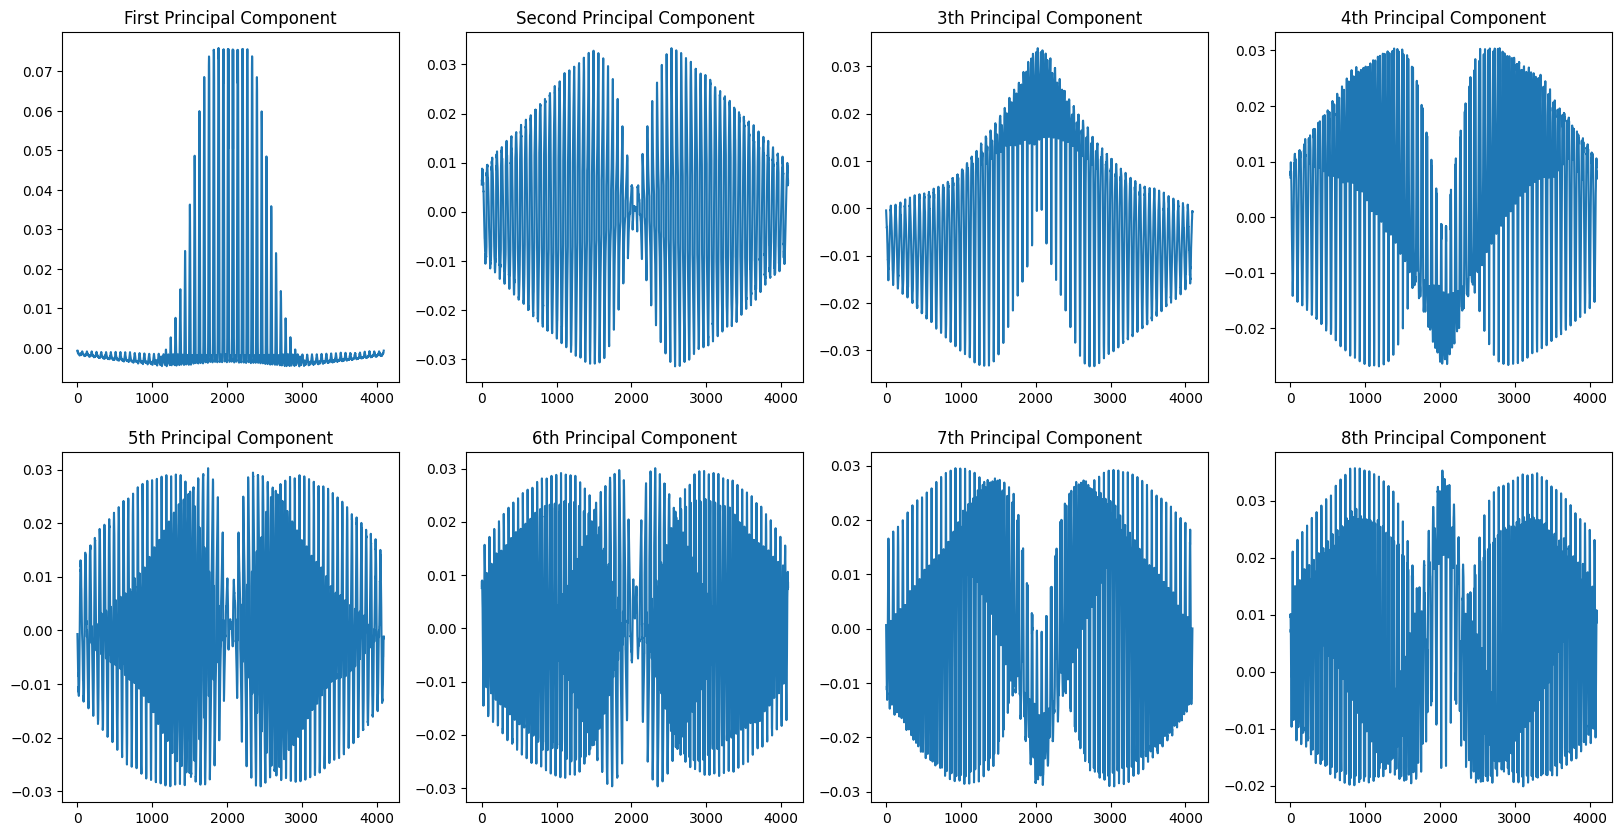

In [12]:
components = pca.components_

# 이미지 형태, 예를 들면 (28, 28) 같은 MNIST 데이터의 경우

plt.figure(figsize=(20,10))

# 첫 번째 component를 표시합니다.
plt.subplot(2, 4, 1)
plt.plot(components[0])
plt.title("First Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 2)
plt.plot(components[1])
plt.title("Second Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 3)
plt.plot(components[2])
plt.title("3th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 4)
plt.plot(components[3])
plt.title("4th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 5)
plt.plot(components[4])
plt.title("5th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 6)
plt.plot(components[5])
plt.title("6th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 7)
plt.plot(components[6])
plt.title("7th Principal Component")

# 두 번째 component를 표시합니다.
plt.subplot(2, 4, 8)
plt.plot(components[7])
plt.title("8th Principal Component")

plt.show()

## 두 커널간의 pca 성분 비교

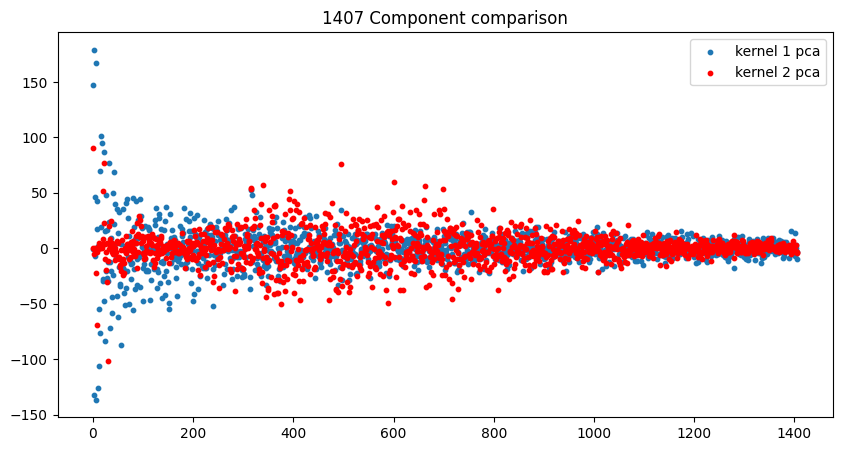

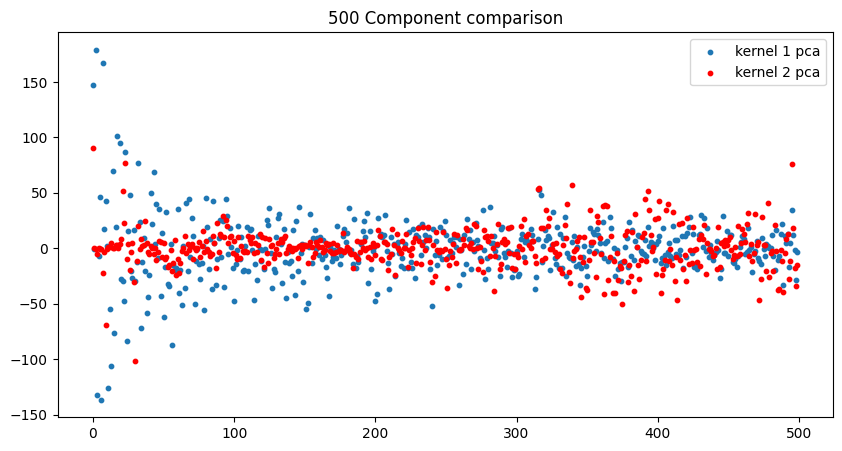

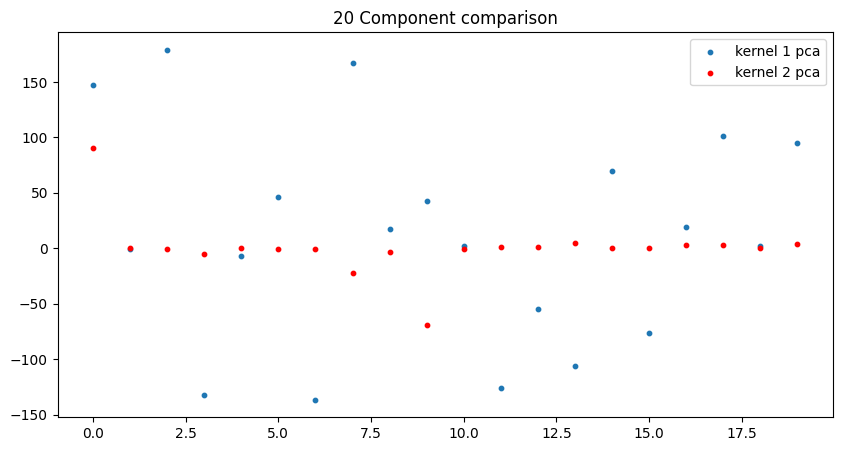

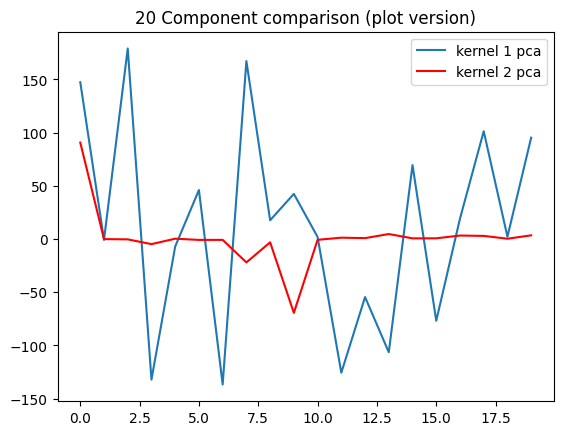

In [196]:
from motionblur.motionblur import Kernel
num_of_components=len(pca.components_)

# num=random.uniform(0.2,1.0)

kernel_size = 64

# kernel = Kernel(size=(kernel_size,kernel_size), intensity=0.2)
# # Save kernel as image. (Do not show kernel, just save.)
# kernel.displayKernel(save_to=f"same_{1}.png", show=False)


# kernel = Kernel(size=(kernel_size,kernel_size), intensity=0.8)
# # Save kernel as image. (Do not show kernel, just save.)
# kernel.displayKernel(save_to=f"same_{2}.png", show=False)


kernel1=np.array(io.imread('same_1.png', as_gray=True)).reshape(1,-1)
kernel2=np.array(io.imread('50000.png', as_gray=True)).reshape(1,-1)

scaler.transform(kernel1)
kernel1_pca=pca.transform(kernel1)

scaler.transform(kernel2)
kernel2_pca=pca.transform(kernel2)


plt.figure(figsize=(10,5))


X=list(range(num_of_components))
# 첫 번째 component를 표시합니다.
plt.scatter(X,kernel1_pca[0][:num_of_components],s=10, label='kernel 1 pca')
plt.scatter(X,kernel2_pca[0][:num_of_components],s=10, color='red', label='kernel 2 pca')
plt.title("1407 Component comparison")
# 범례 표시
plt.legend()

plt.show()

plt.figure(figsize=(10,5))



X=list(range(500))
# 첫 번째 component를 표시합니다.
plt.scatter(X,kernel1_pca[0][:500],s=10, label='kernel 1 pca')
plt.scatter(X,kernel2_pca[0][:500],s=10, color='red', label='kernel 2 pca')
plt.title("500 Component comparison")
# 범례 표시
plt.legend()

plt.show()

plt.figure(figsize=(10,5))





X=list(range(20))
# 첫 번째 component를 표시합니다.
plt.scatter(X,kernel1_pca[0][:20],s=10, label='kernel 1 pca')
plt.scatter(X,kernel2_pca[0][:20],s=10, color='red', label='kernel 2 pca')
plt.title("20 Component comparison")
# 범례 표시
plt.legend()

plt.show()

X=list(range(20))
# 첫 번째 component를 표시합니다.
plt.plot(X,kernel1_pca[0][:20], label='kernel 1 pca')
plt.plot(X,kernel2_pca[0][:20], color='red', label='kernel 2 pca')
plt.title("20 Component comparison (plot version)")
# 범례 표시
plt.legend()

plt.show()


In [154]:
kernel2_pca.shape

(1, 1407)

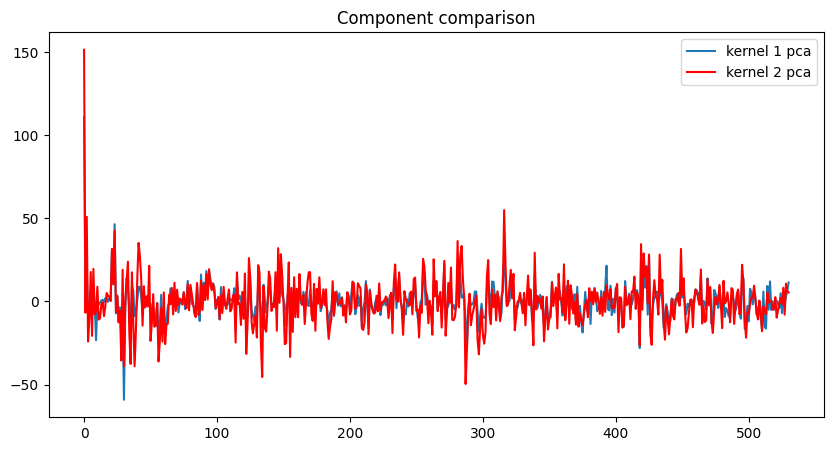

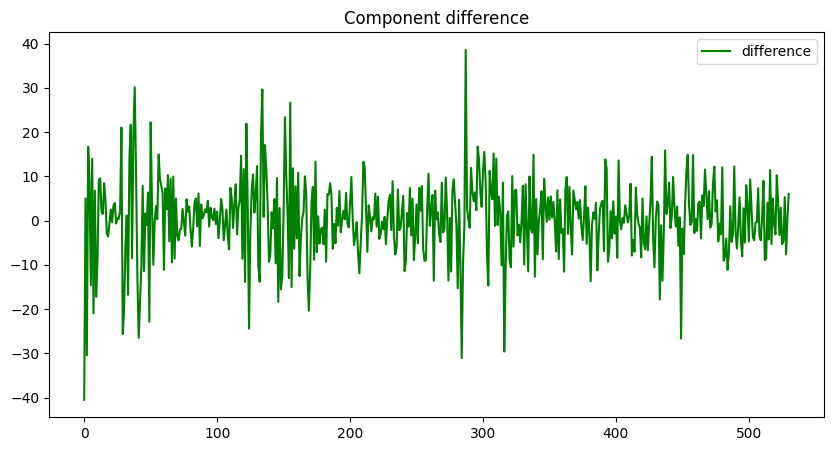

In [129]:
plt.figure(figsize=(10,5))

X=list(range(531))
# 첫 번째 component를 표시합니다.
plt.plot(X,kernel1_pca[0],label='kernel 1 pca')
plt.plot(X,kernel2_pca[0],color='red', label='kernel 2 pca')
plt.title("Component comparison")
# 범례 표시
plt.legend()

plt.show()

diff = kernel1_pca[0] - kernel2_pca[0]

plt.figure(figsize=(10,5))

X=list(range(531))
# 첫 번째 component를 표시합니다.
plt.plot(X,diff,color='green',label='difference')
plt.title("Component difference")
# 범례 표시
plt.legend()

plt.show()

# PCA 변화 양상 관찰 

In [ ]:
c= np.arange(-25000, 25000, 100).tolist()
data_mean=np.mean(data_standardized,axis=0)
img_list=[]
for j in range(8):
    for i in c:

        p =data_mean + i * components[j]
        p=p.reshape(64,64)

        img = Image.fromarray(p)
 
        draw = ImageDraw.Draw(img)

        # 선택적: 원하는 폰트를 사용하기 위해 ImageFont 객체 생성 (이 경우는 기본 폰트 사용)
        # font = ImageFont.truetype("arial.ttf", 15)

        text = f"pc_{j+ 1}"
        draw.text((0,0), text, fill=255)  # (5,5)는 텍스트를 그릴 위치입니다.

        img_list.append(img)

imageio.mimsave(f'output.gif', img_list, duration=0.5)
    

## blur kernel

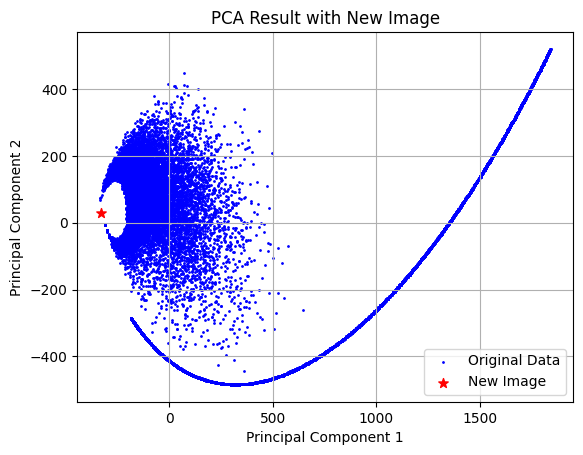

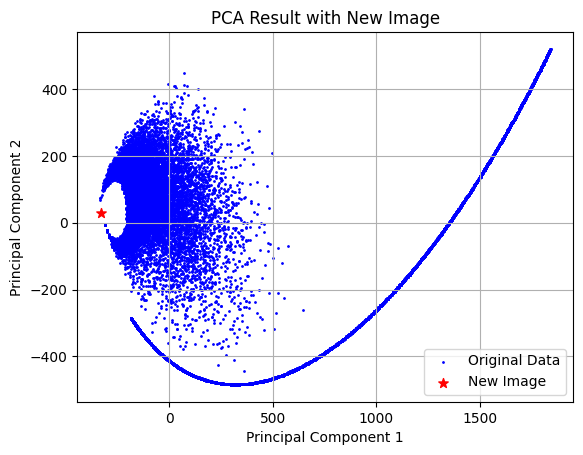

In [79]:
# Initialise Kernel
kernel_size=64

K=[]

for i in (range(0,2)):
    num=random.uniform(0.2,1.0)
    kernel = Kernel(size=(kernel_size,kernel_size), intensity=num)


    # Save kernel as image. (Do not show kernel, just save.)
    kernel.displayKernel(save_to=f"{i}.png", show=False)
    k=kernel.kernelMatrix

    

    
    k=k.reshape(1,-1)
    

    new_pca_result=pca.transform(k)

    plt.scatter(pca_result[:, 0], pca_result[:, 1], s=1, c='blue', label='Original Data')

    # 새로운 이미지의 PCA 결과 표시
    plt.scatter(new_pca_result[:, 0], new_pca_result[:, 1], s=50, c='red', marker='*', label='New Image')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result with New Image')
    plt.grid(True)
    plt.legend()
    plt.show()

# gaussian

(1, 4096)


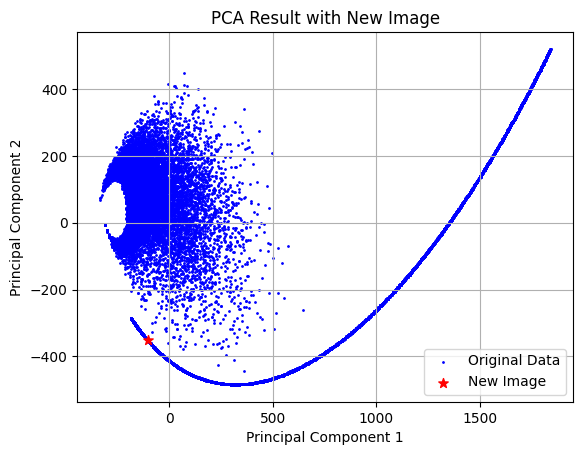

(1, 4096)


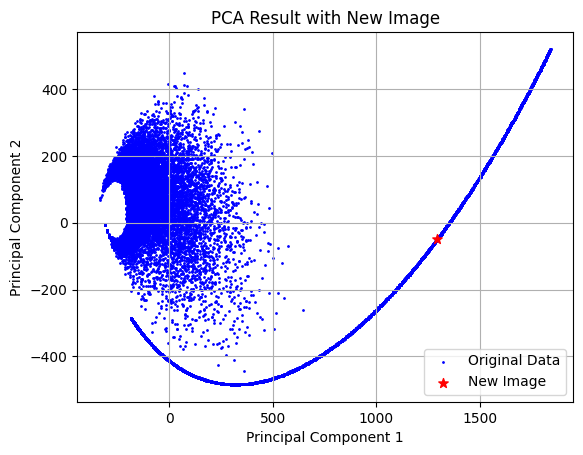

In [93]:
def generate_gaussian_kernel(size, sigma):
    # Generate a 1D Gaussian kernel
    gk_1d = cv2.getGaussianKernel(size, sigma)
    # Create a 2D Gaussian kernel from the outer product of the 1D kernel
    gk_2d = np.outer(gk_1d, gk_1d)
    return gk_2d

def save_kernels_to_folder(num_kernels, size, sigma_range, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    g=[]
    for i in range(50000,num_kernels+50000):
        # Sample a random sigma from the given range
        sigma = np.random.uniform(sigma_range[0], sigma_range[1])
        kernel = generate_gaussian_kernel(size, sigma)
        
        # Normalize the kernel values to [0, 255] for saving as an image
        normalized_kernel = ((kernel - kernel.min()) * (1/(kernel.max() - kernel.min()) * 255)).astype('uint8')
        
        
        filename = os.path.join(save_folder, f'{i}.png')
        cv2.imwrite(filename, normalized_kernel)

        g.append(normalized_kernel)
    g=np.array(g)
    return g

# Parameters
num_kernels = 2
size = kernel_size
sigma_range = (0.1, 5.0)
save_folder = '.' 


g=save_kernels_to_folder(num_kernels, size, sigma_range, save_folder)
g=g.reshape(g.shape[0], -1)


for i in range(num_kernels):
    gausian=g[i:i+1]
    print(gausian.shape)
    new_pca_result=pca.transform(gausian)

    plt.scatter(pca_result[:, 0], pca_result[:, 1], s=1, c='blue', label='Original Data')

    # 새로운 이미지의 PCA 결과 표시
    plt.scatter(new_pca_result[:, 0], new_pca_result[:, 1], s=50, c='red', marker='*', label='New Image')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result with New Image')
    plt.grid(True)
    plt.legend()
    plt.show()
    


In [71]:
new_pca_result

array([[-329.98351148,   30.0583783 ],
       [-329.87725023,   29.91773744],
       [-329.97318434,   30.05788394],
       [-329.98467228,   30.05313798],
       [-329.98888174,   30.07902257],
       [-329.96156056,   30.04953984],
       [-329.99033428,   30.0545779 ],
       [-329.98599085,   30.06388776],
       [-329.95739907,   30.0621453 ],
       [-329.92178913,   30.01732663]])

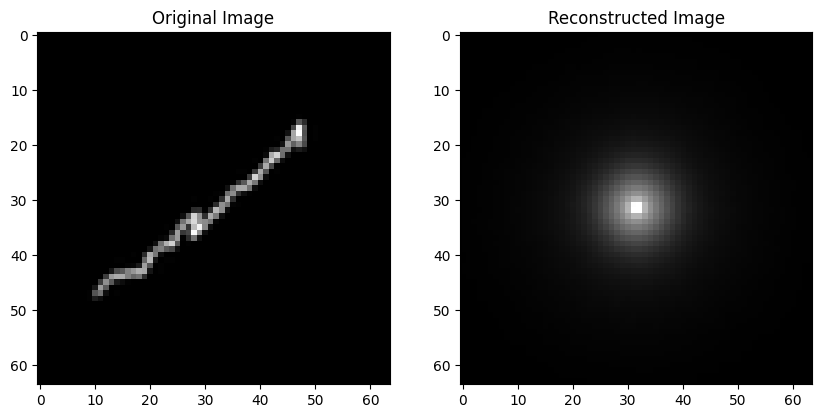

In [6]:
# 주어진 데이터에 PCA를 적용한 후 역변환합니다.
pca = PCA(n_components=2)

pca_result = pca.fit_transform(data)

# PCA 결과를 원래 차원으로 복구합니다.
reconstructed_data_original_scale= pca.inverse_transform(pca_result)




import matplotlib.pyplot as plt

# 원래 이미지와 복구된 이미지를 비교합니다.
index = 100  # 예시 이미지의 인덱스

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data[index].reshape(64,64), cmap='gray')  # 원본 이미지
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data_original_scale[index].reshape(64,64), cmap='gray')  # 복구된 이미지
plt.title("Reconstructed Image")

plt.show()


# 3D

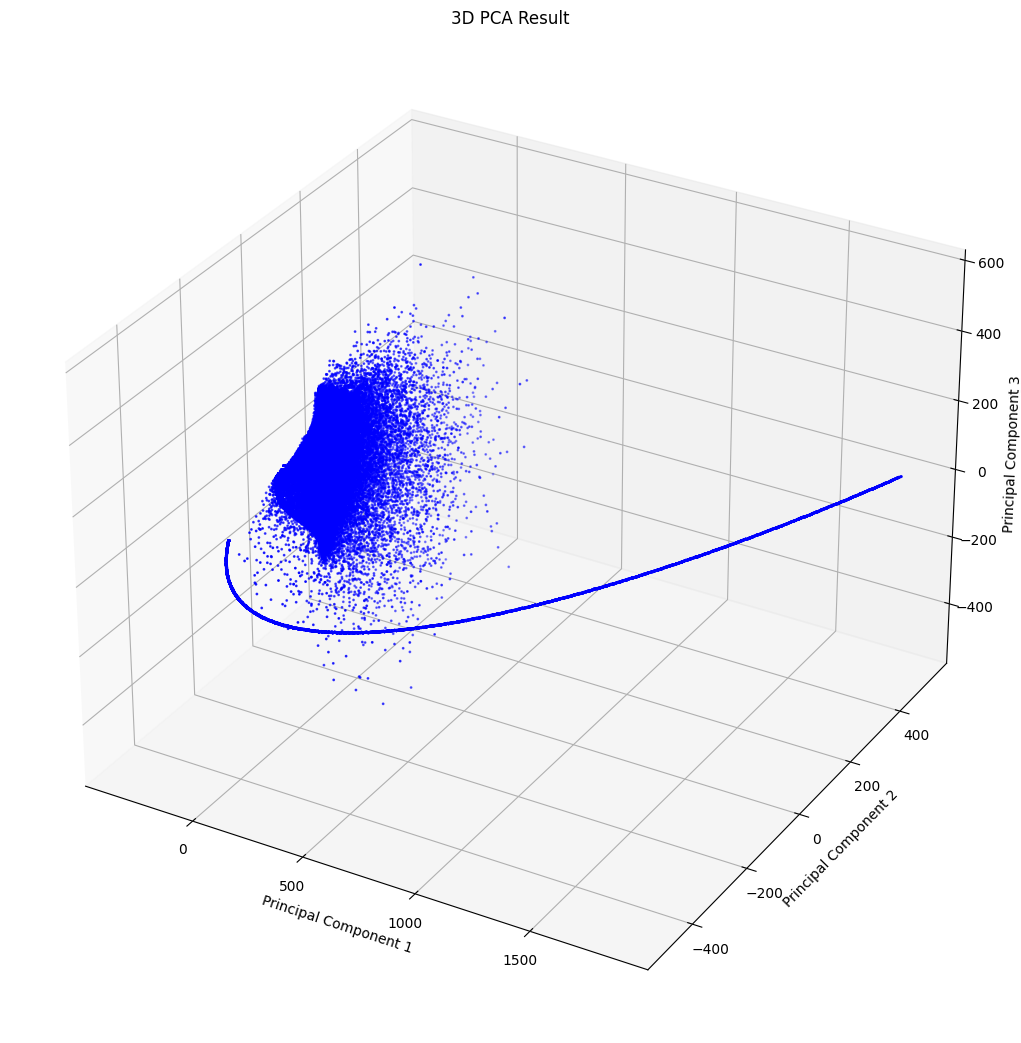

In [94]:
pca = PCA(n_components=3)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
pca_result = pca.fit_transform(data)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], s=1, c='blue')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Result')

plt.show()

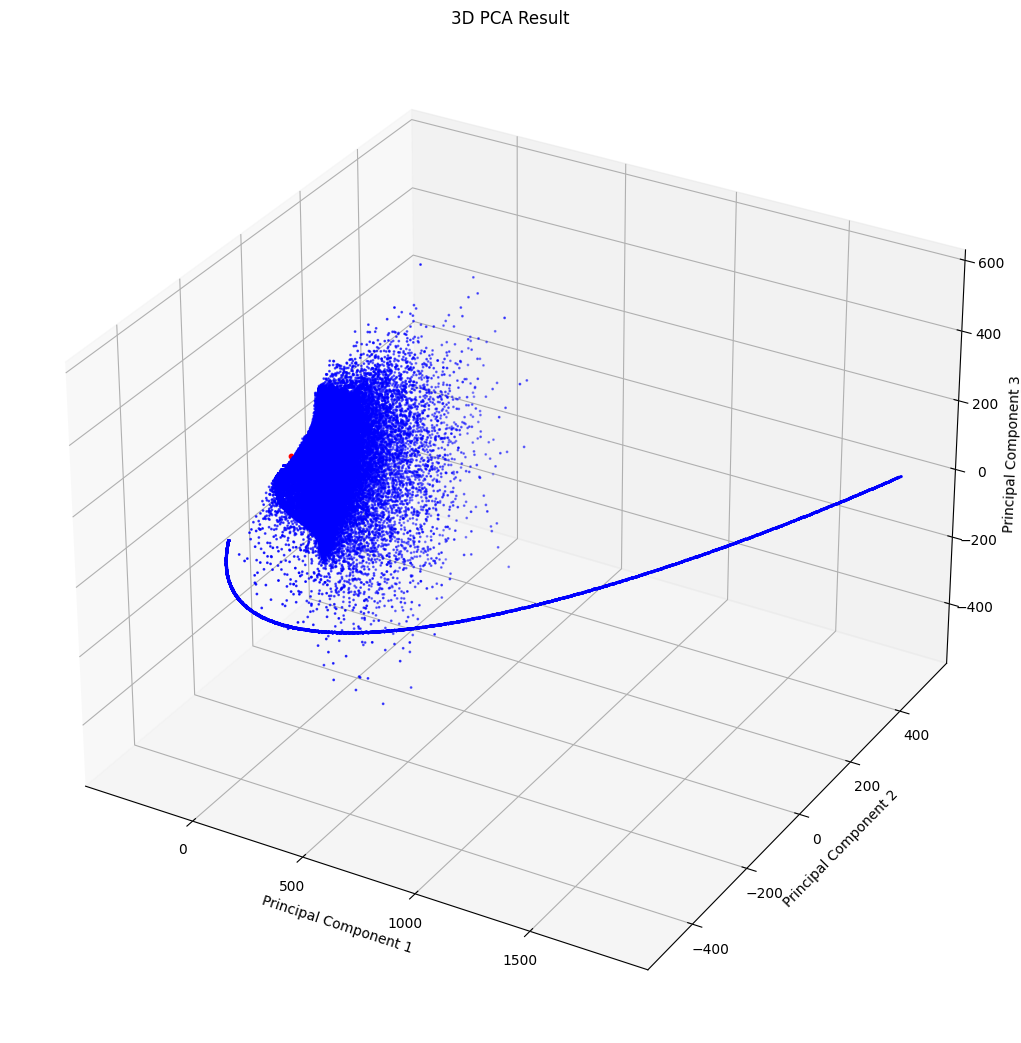

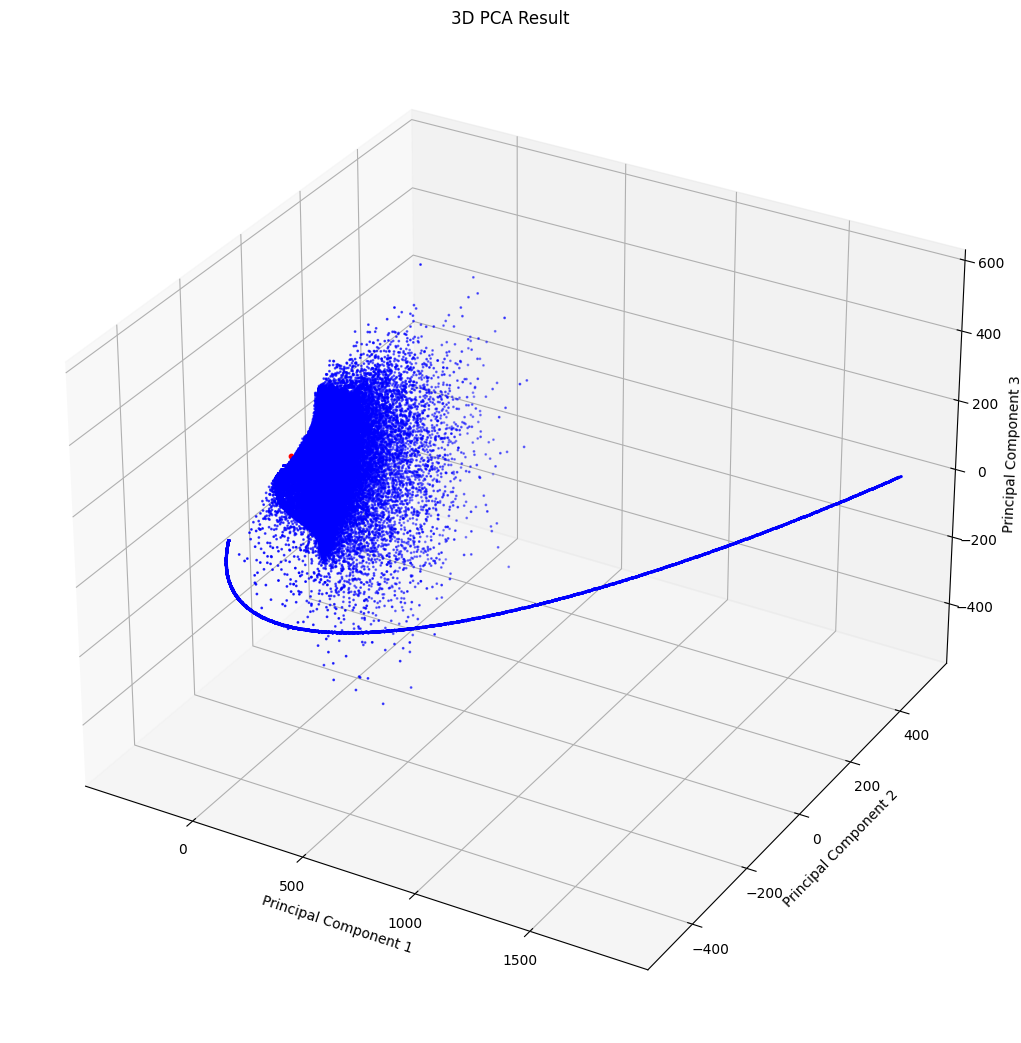

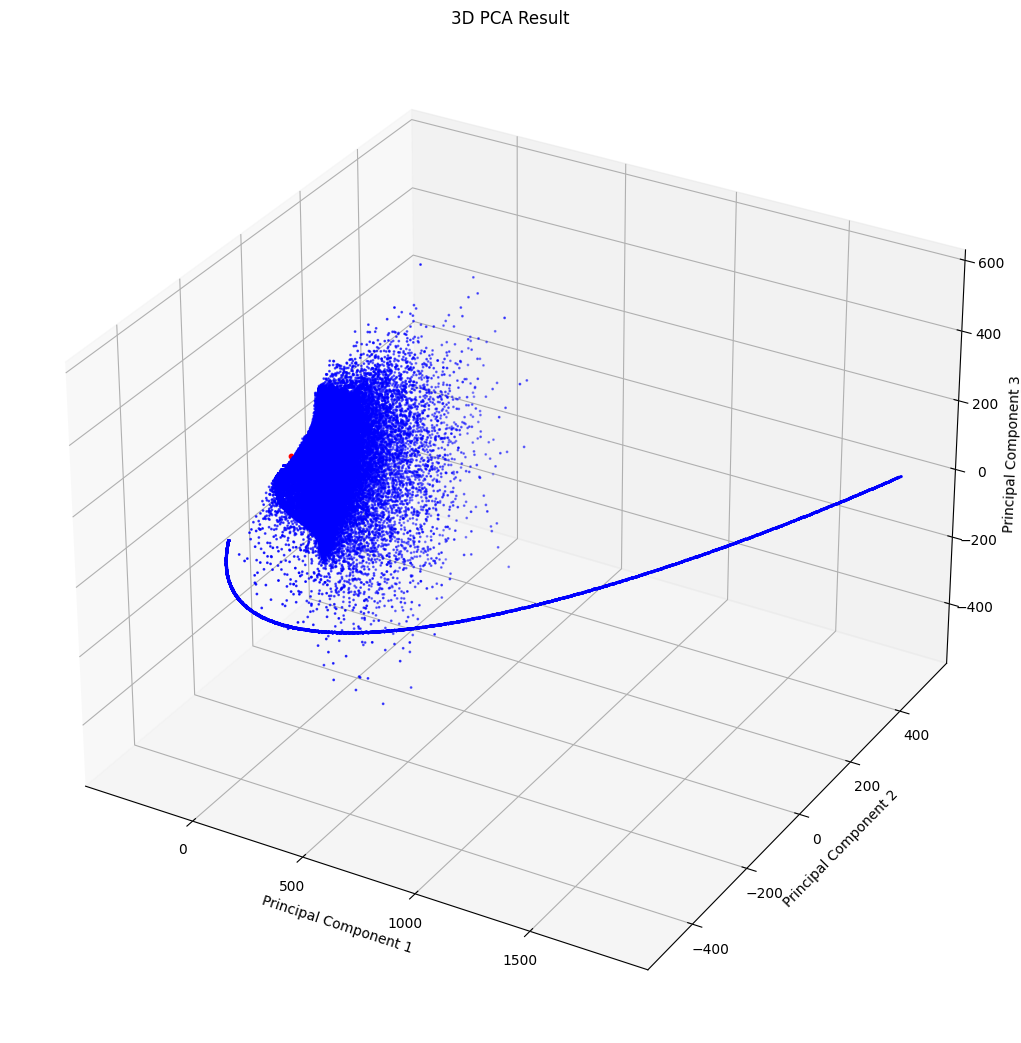

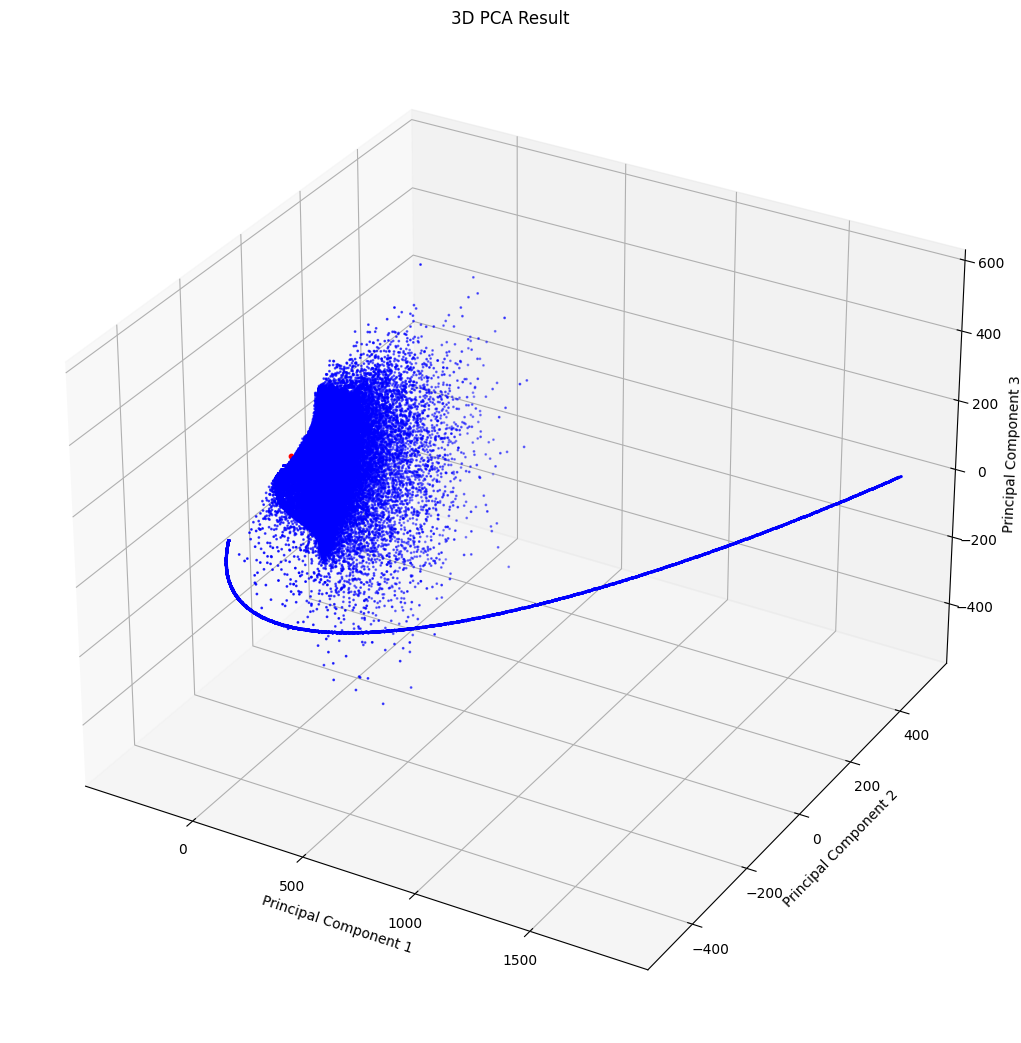

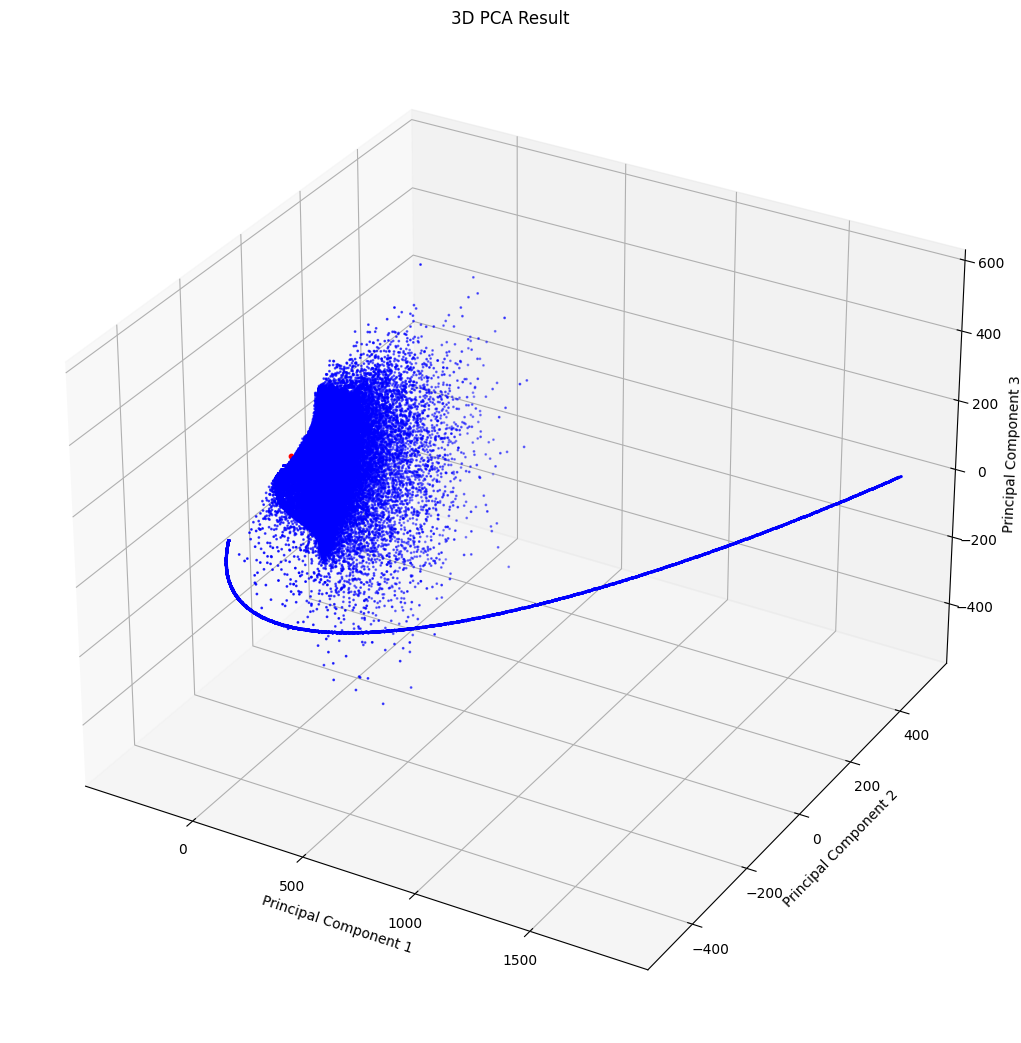

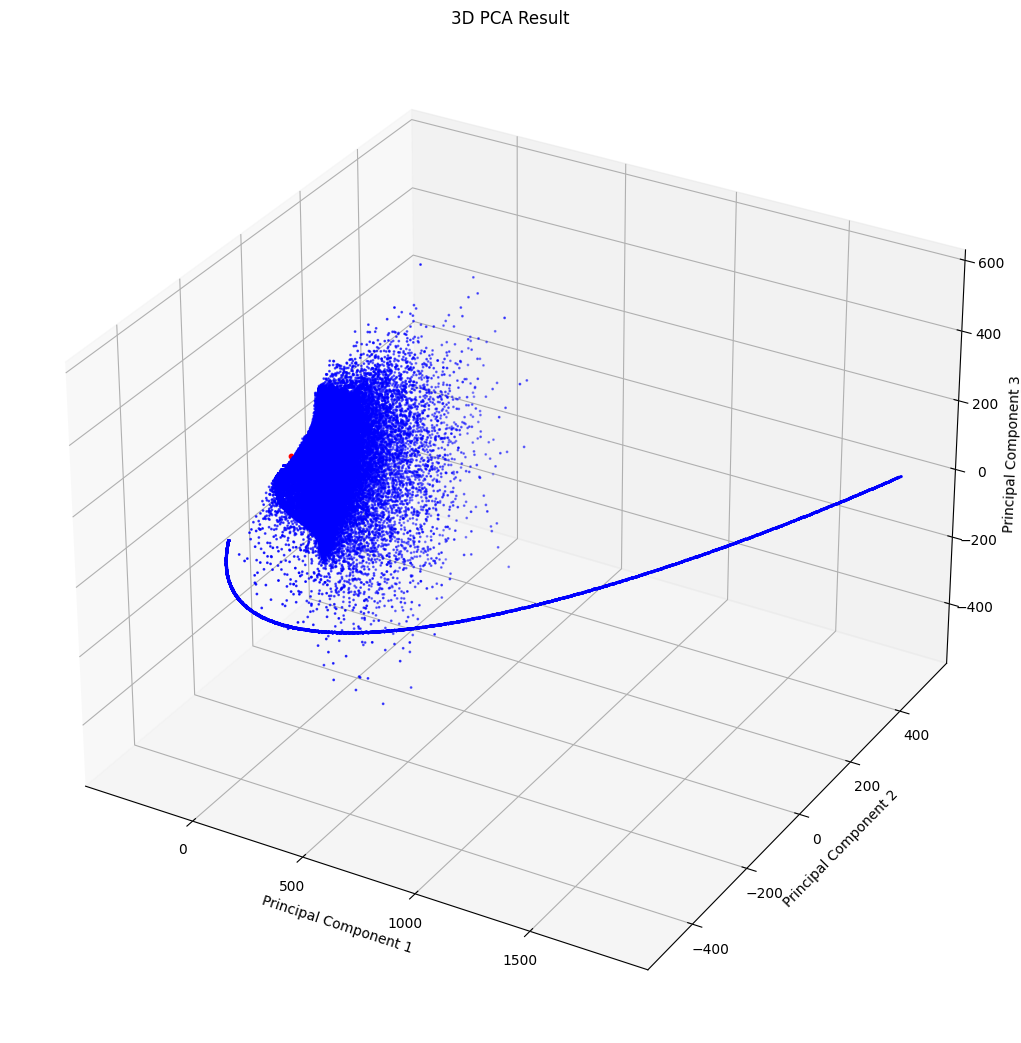

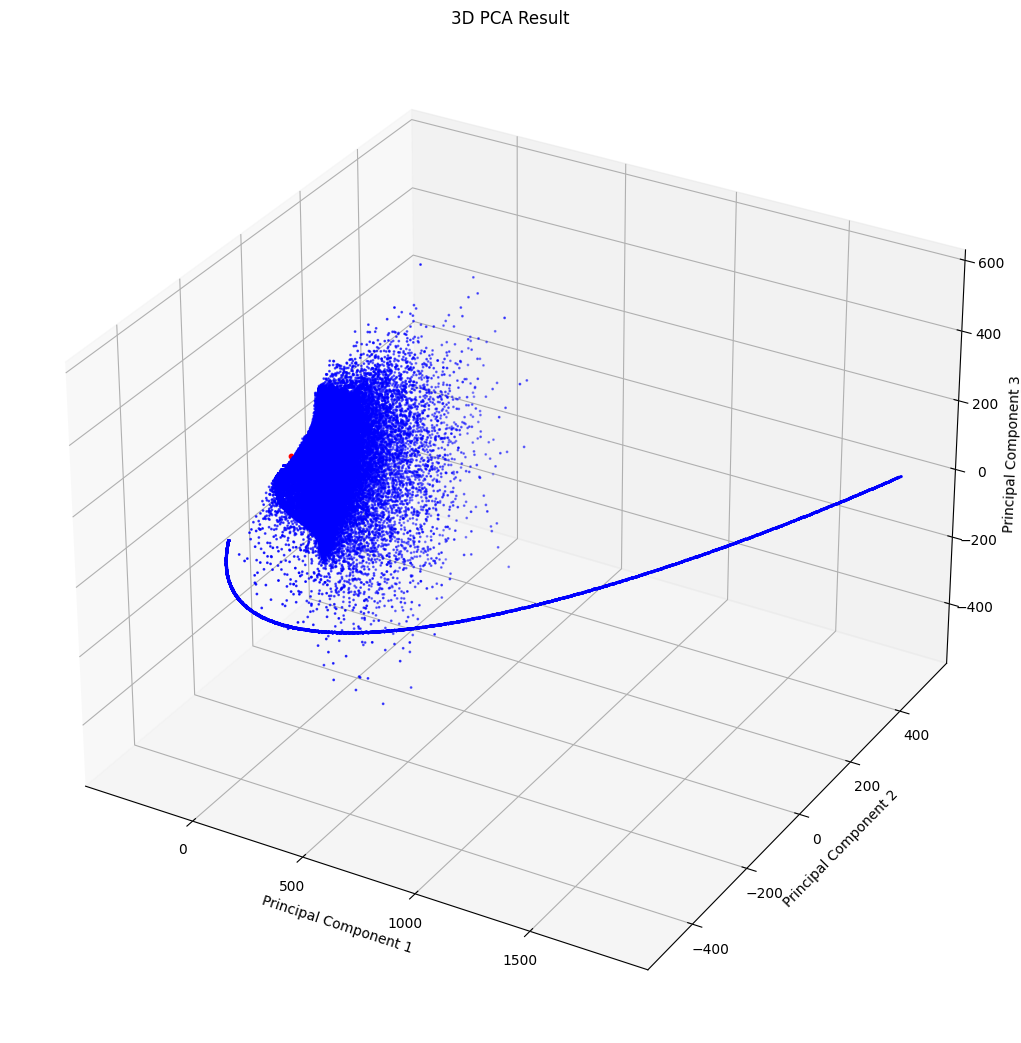

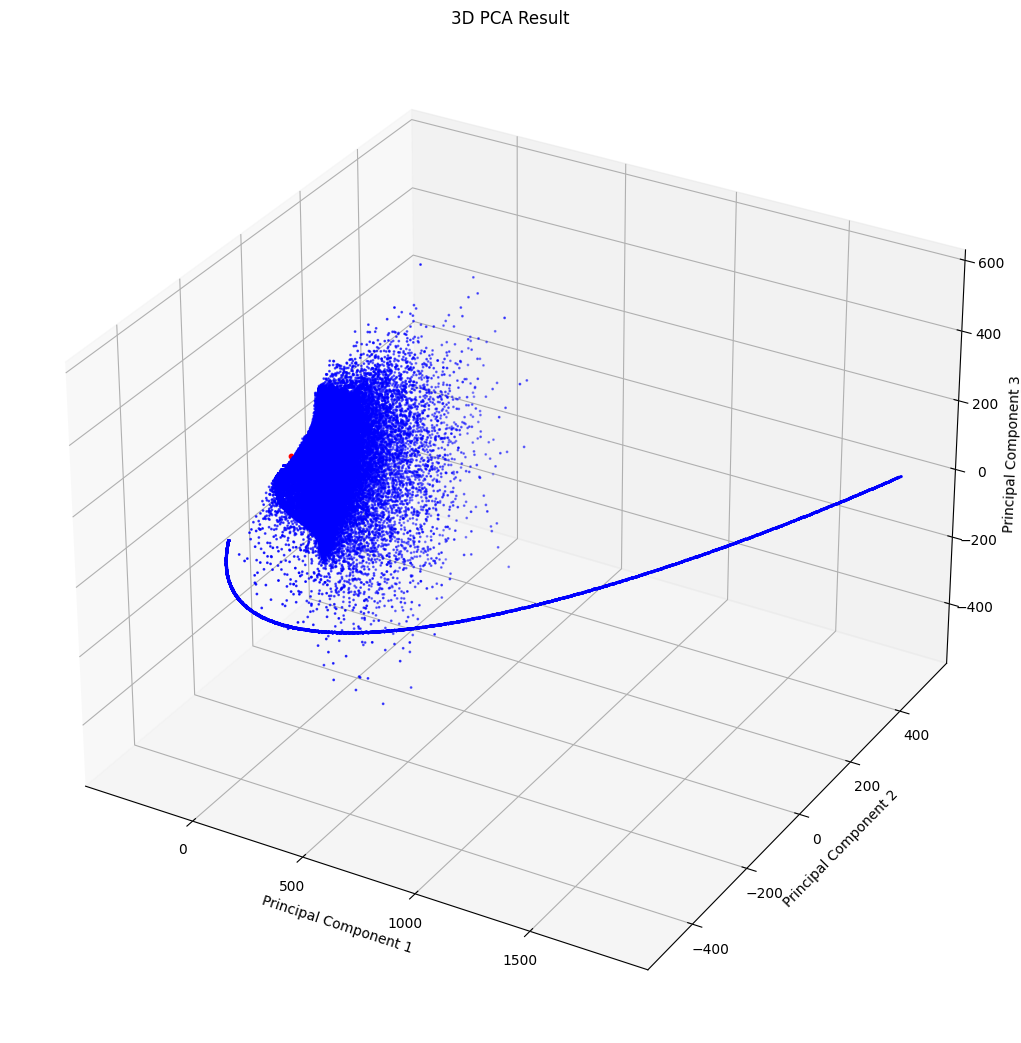

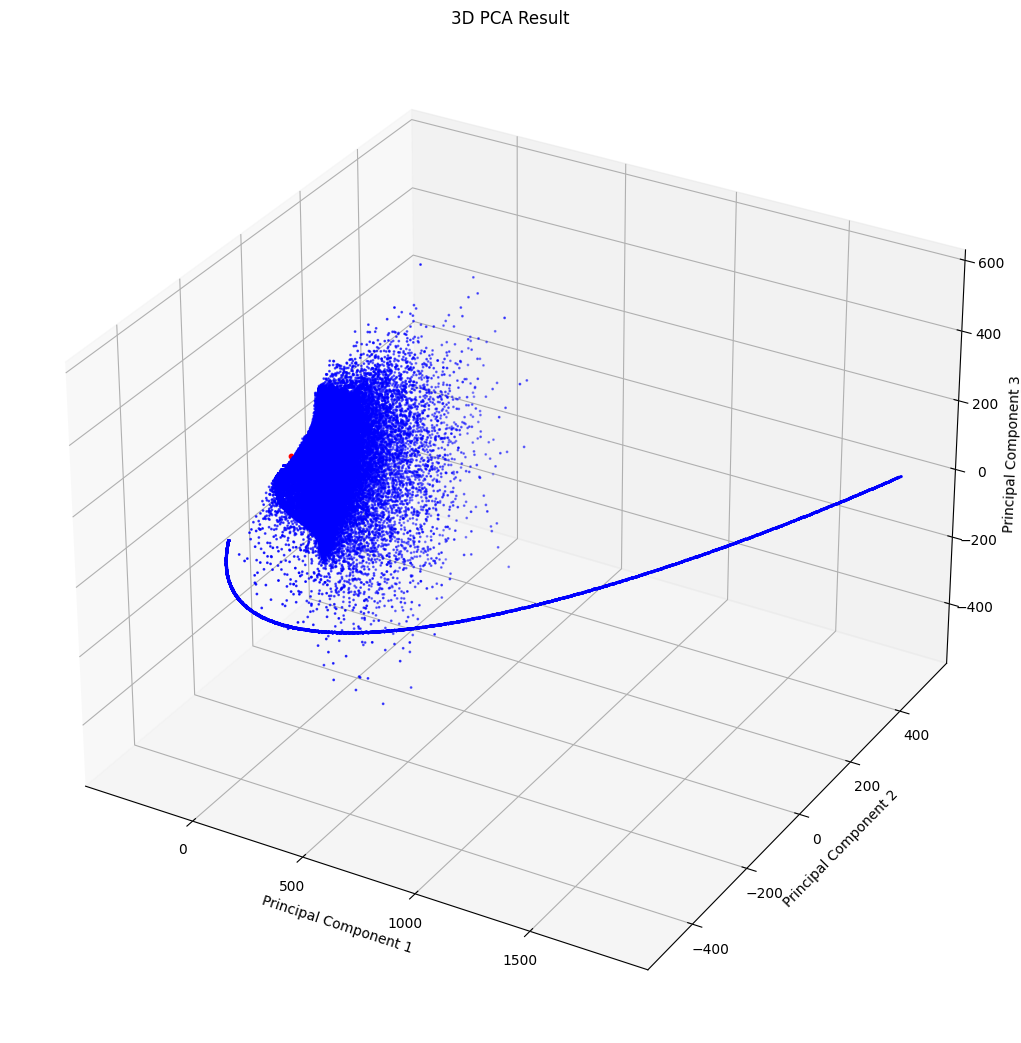

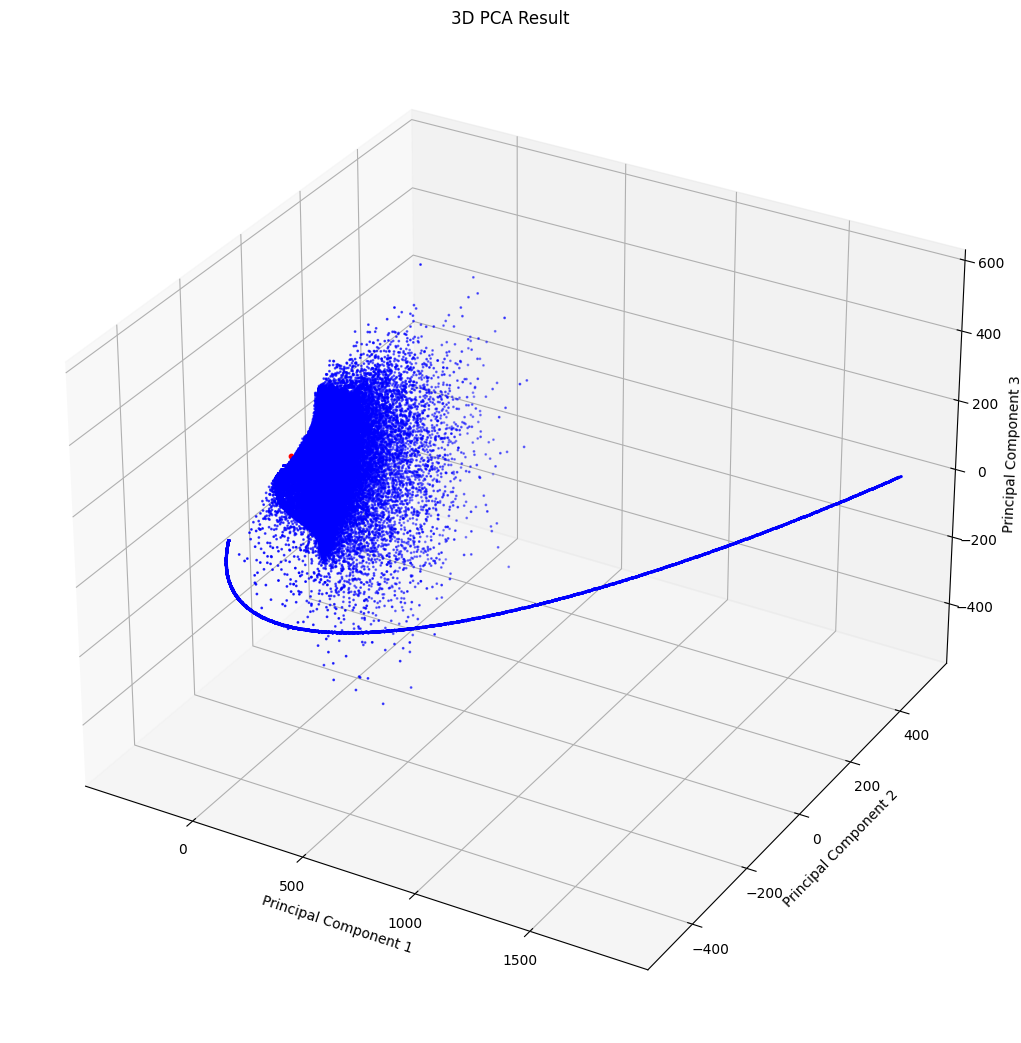

In [97]:
# Initialise Kernel
kernel_size=64

K=[]

for i in (range(0,10)):
    num=random.uniform(0.2,1.0)
    kernel = Kernel(size=(kernel_size,kernel_size), intensity=num)


    # Save kernel as image. (Do not show kernel, just save.)
    kernel.displayKernel(save_to=f"{i}.png", show=False)
    k=kernel.kernelMatrix

    

    
    k=k.reshape(1,-1)
    

    new_pca_result=pca.transform(k)


    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], s=1, c='blue')
    ax.scatter(new_pca_result[:, 0], new_pca_result[:, 1], new_pca_result[:, 2], s=10, c='red')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA Result')

In [ ]:
pca.we

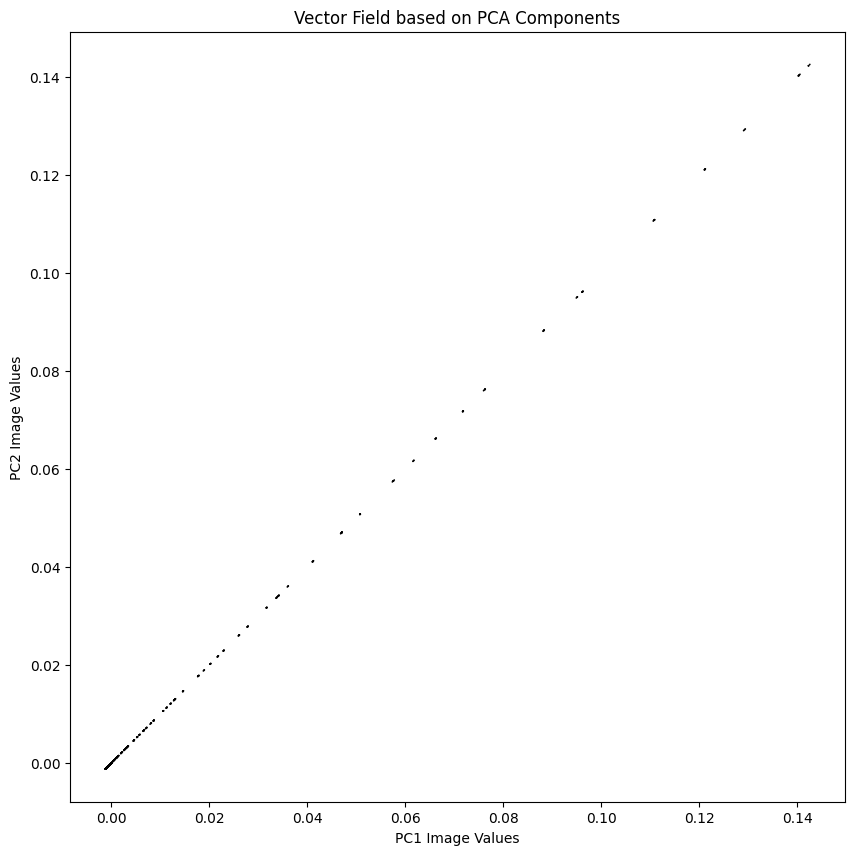

In [8]:
plt.figure(figsize=(10, 10))

u = np.gradient(pca.components_[0])[1]  # Taking the x-gradient for u
v = np.gradient(pca.components_[1])[0]  # Taking the y-gradient for v

# Create a quiver plot using the PCA components
plt.quiver(pca.components_[0], pca.components_[0], u, v, angles='xy', scale_units='xy', scale=1)
plt.title('Vector Field based on PCA Components')
plt.xlabel('PC1 Image Values')
plt.ylabel('PC2 Image Values')
plt.axis('equal')

plt.show()


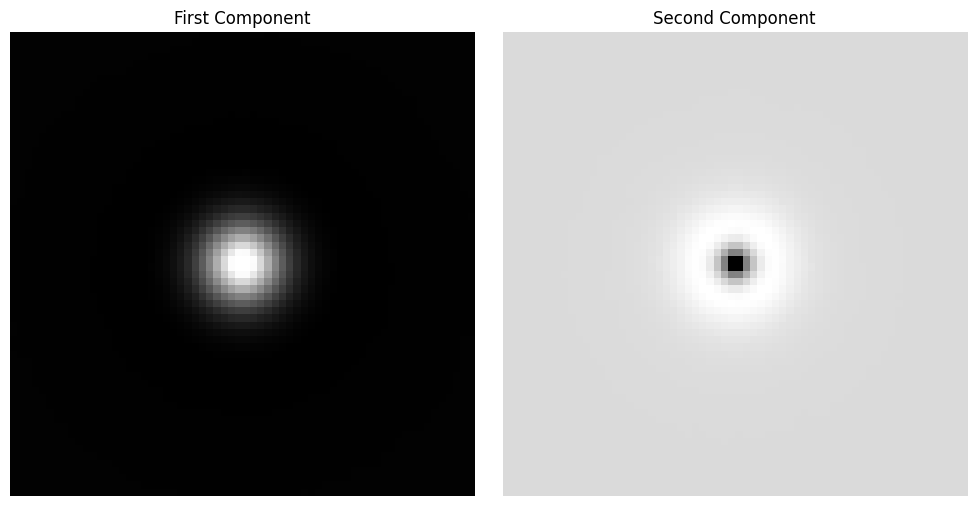

In [9]:
# 주성분을 이미지로 변환하여 시각화
component1_image = pca.components_[0].reshape(64, 64)
component2_image = pca.components_[1].reshape(64, 64)

fig, axarr = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 주성분 이미지
axarr[0].imshow(component1_image, cmap='gray')
axarr[0].axis('off')
axarr[0].set_title('First Component')

# 두 번째 주성분 이미지
axarr[1].imshow(component2_image, cmap='gray')
axarr[1].axis('off')
axarr[1].set_title('Second Component')

plt.tight_layout()
plt.show()

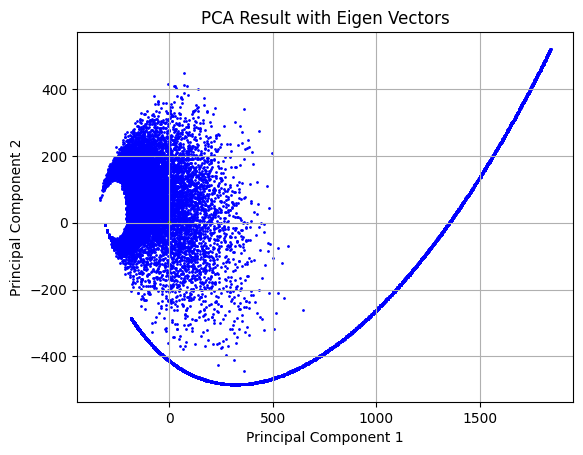

In [11]:
# 2D PCA 결과 시각화
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=1, c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with Eigen Vectors')

# 주성분의 방향 화살표로 시각화
origin = [0], [0]  # 원점
plt.quiver(*origin, pca.components_[0, 0], pca.components_[0, 1], color='r', angles='xy', scale_units='xy', scale=10)
plt.quiver(*origin, pca.components_[1, 0], pca.components_[1, 1], color='g', angles='xy', scale_units='xy', scale=10)

plt.grid(True)
plt.show()

In [13]:
pca.components_

array([[-7.15772268e-06, -9.25977917e-06, -1.13859737e-05, ...,
        -7.66337971e-06, -6.30051464e-06, -6.57816290e-06],
       [ 9.81048673e-06,  1.67449859e-05,  2.36195964e-05, ...,
         1.04788466e-05,  1.92527612e-05,  2.36029847e-05]])

In [14]:
pca.components_.shape

(2, 4096)